In [72]:
import pandas as pd
import os

In [76]:
# Empty DataFrame that will contain 12 month data Afterward
all_months_data= pd.DataFrame()

files =[file for file in os.listdir('C:\\Users\\user\\Desktop\\Africa-Data-School-Curriculum-main\\Africa-Data-School-Curriculum-main\\notebooks\\16 Lesson Sales Analysis/Sales_Data')]

for file in files:

    df=pd.read_csv('C:\\Users\\user\\Desktop\\Africa-Data-School-Curriculum-main\\Africa-Data-School-Curriculum-main\\notebooks\\16 Lesson Sales Analysis/Sales_Data/'+file)

# Concatinating multiple csvs together to create a new DataFrame
all_months_data=pd.concat([all_months_data, df])

all_months_data.head()

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\user\\Desktop\\Africa-Data-School-Curriculum-main\\Africa-Data-School-Curriculum-main\\notebooks\\16 Lesson Sales Analysis/Sales_Data/.ipynb_checkpoints'

In [78]:
# Save the merged data as csv
all_months_data.to_csv('all_data.csv', index=False)


In [82]:
all_data=pd.read_csv('all_data.csv')
all_data.head()

EmptyDataError: No columns to parse from file

In [15]:
# Find missing values
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
198,NaN,NaN,NaN,NaN,NaN,NaN
574,NaN,NaN,NaN,NaN,NaN,NaN
776,NaN,NaN,NaN,NaN,NaN,NaN
1383,NaN,NaN,NaN,NaN,NaN,NaN
1436,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Drop rows with missing values.
all_data=all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [21]:
# Find text in order date.
temp_df=all_data[all_data['Order Date'].str[0:2]=='Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1679,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3732,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3790,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4323,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
5579,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [23]:
# A dataframe without or in order date.
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']


In [25]:
# Check column type
all_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11629 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          11629 non-null  object
 1   Product           11629 non-null  object
 2   Quantity Ordered  11629 non-null  object
 3   Price Each        11629 non-null  object
 4   Order Date        11629 non-null  object
 5   Purchase Address  11629 non-null  object
dtypes: object(6)
memory usage: 636.0+ KB


In [56]:
# Convert columns to correct type
# Convert 'Quantity Ordered' column to numeric type (integer)
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

# Convert 'Price Each' column to numeric type (float)
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [58]:
# Add month column.
# Extract the first 2 digits in order date.
all_data['Month']=all_data['Order Date'].str[0:2]
# Convert to string.
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95


In [60]:
# Add sales column.
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95


 What was the best month for sales? How much was earned that month?



In [62]:
# Total Sales (REVENUE 2019)
all_data['Sales'].sum()

2098816.6999999997

In [64]:
# What was the best month for sales?
best_month_for_sales=all_data.groupby('Month').sum()
best_month_for_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
Month,,,,,,,
9,2481512481522481532481542481552481562481572481...,AA Batteries (4-pack)USB-C Charging CableUSB-C...,13097,2082895.35,09/17/19 14:4409/29/19 10:1909/16/19 17:4809/2...,"380 North St, Los Angeles, CA 90001511 8th St,...",2095463.39
10,2486432501392501392502752506842512432521642522...,Lightning Charging CableGoogle PhoneUSB-C Char...,22,3347.33,10/01/19 01:3610/01/19 00:5310/01/19 00:5310/0...,"321 Chestnut St, Austin, TX 73301132 10th St, ...",3353.31


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (12,) and arg 1 with shape (2,).

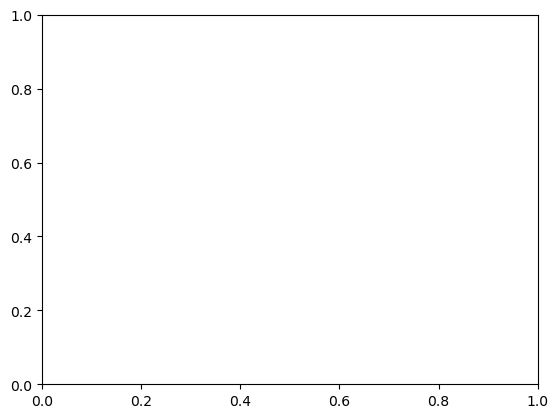

In [68]:
import matplotlib.pyplot as plt
months=range(1,13)
plt.bar(months, best_month_for_sales['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ')
plt.xlabel('Month Number ')
plt.show()
